In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import datetime
import time
from numpy import array
import requests

In [2]:
df = pd.read_csv('MERGED2015_16_PP.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,9,1725,1726,1727,1728,1729,1743) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
dfmore = pd.read_csv('MERGED2014_15_PP.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (6,1169,1170,1171,1172,1173,1174,1175,1177,1178,1179,1183,1184,1185,1186,1187,1188,1196,1199,1200,1201,1209,1212,1213,1214,1222,1223,1224,1225,1226,1227,1235,1236,1237,1238,1239,1240,1248,1250,1251,1252,1253,1255,1257,1261,1263,1264,1265,1266,1268,1270,1274,1275,1276,1277,1278,1279,1283,1287,1288,1289,1290,1291,1292,1296,1303,1316,1326,1327,1328,1329,1330,1331,1335,1339,1340,1341,1342,1343,1344,1348,1379,1380,1381,1382,1383,1384,1385,1386,1387,1388,1389,1390,1391,1392,1393,1394,1395,1396,1397,1398,1399,1400,1401,1402,1403,1404,1405,1406,1407,1411,1426,1427,1475,1476,1479,1480,1483,1484,1487,1488,1489,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499,1500,1501,1502,1503,1517,1529,1530,1532,1537,1540,1541,1542,1575,1576,1577,1578,1579,1580,1581,1582,1583,1584,1585,1586,1587,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597,1598,1599,1600,1601,1602,1606,1609,1610,1613,1614,1615,1708,1729) ha

In [43]:
pd.concat([df,dfmore], axis=0).shape

(15296, 1777)

In [3]:
df.columns

Index(['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP',
       'ACCREDAGENCY', 'INSTURL', 'NPCURL',
       ...
       'D150_L4_WHITENH', 'D150_L4_BLACKNH', 'D150_L4_API', 'D150_L4_AIANOLD',
       'D150_L4_HISPOLD', 'D_PCTPELL_PCTFLOAN', 'OPENADMP', 'UGNONDS', 'GRADS',
       'ACCREDCODE'],
      dtype='object', length=1777)

In [4]:
df.shape

(7593, 1777)

In [5]:
df.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,D150_L4_WHITENH,D150_L4_BLACKNH,D150_L4_API,D150_L4_AIANOLD,D150_L4_HISPOLD,D_PCTPELL_PCTFLOAN,OPENADMP,UGNONDS,GRADS,ACCREDCODE
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,...,NaN,NaN,NaN,NaN,NaN,4210.0,2.0,NaN,1123.0,SACSCC
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,...,NaN,NaN,NaN,NaN,NaN,11679.0,2.0,242.0,6822.0,SACSCC
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,NaN,NaN,NaN,NaN,NaN,279.0,1.0,NaN,319.0,SACSCC
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,NaN,NaN,NaN,NaN,NaN,5618.0,2.0,184.0,1853.0,SACSCC
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,...,NaN,NaN,NaN,NaN,NaN,4805.0,2.0,24.0,619.0,SACSCC


In [6]:
df_school= df[['INSTNM','CITY','STABBR','ZIP','ACCREDAGENCY','INSTURL','NPCURL','SCH_DEG','HCM2','MAIN','NUMBRANCH',
'PREDDEG','HIGHDEG','CONTROL','ST_FIPS','REGION','LOCALE', 'LOCALE2', 'CCBASIC', 'CCUGPROF','CCSIZSET','HBCU',
'PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY','WOMENONLY','RELAFFIL','DISTANCEONLY','CURROPER'
,'TUITFTE','INEXPFTE','AVGFACSAL','PFTFAC','ALIAS','ICLEVEL','OPENADMP','ACCREDCODE','T4APPROVALDATE']]

In [7]:
df_school.head()

,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,SCH_DEG,HCM2,MAIN,...,CURROPER,TUITFTE,INEXPFTE,AVGFACSAL,PFTFAC,ALIAS,ICLEVEL,OPENADMP,ACCREDCODE,T4APPROVALDATE
0,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www2.aamu.edu/scripts/netpricecalc/npcalc.htm,NaN,0,1,...,1,9657.0,7941.0,7017.0,0.7096,AAMU,1,2.0,SACSCC,12/12/1965
1,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,www.uab.edu,uab.studentaidcalculator.com/survey.aspx,NaN,0,1,...,1,10263.0,17548.0,10221.0,0.9081,NaN,1,2.0,SACSCC,12/1/1965
2,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,NaN,0,1,...,1,17071.0,7113.0,3217.0,1.0000,Southern Christian University |Regions University,1,1.0,SACSCC,3/26/1987
3,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,NaN,0,1,...,1,8917.0,10619.0,9514.0,0.6173,UAH |University of Alabama Huntsville,1,2.0,SACSCC,12/1/1965
4,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/forms/calculator/index....,NaN,0,1,...,1,7717.0,7742.0,7940.0,0.6395,NaN,1,2.0,SACSCC,12/1/1965


In [8]:
df_school.drop(['INSTURL','NPCURL','CITY','ZIP','STABBR','ACCREDCODE','ACCREDAGENCY','ALIAS','ICLEVEL'], axis=1, inplace=True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
df_school.drop(['SCH_DEG','LOCALE2','RELAFFIL'], axis =1, inplace = True)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [10]:
df_school.isnull().sum()

INSTNM               0
HCM2                 0
MAIN                 0
NUMBRANCH            0
PREDDEG              0
HIGHDEG              0
CONTROL              0
ST_FIPS              0
REGION               0
LOCALE             446
CCBASIC            446
CCUGPROF           446
CCSIZSET           446
HBCU               446
PBI                446
ANNHI              446
TRIBAL             446
AANAPII            446
HSI                446
NANTI              446
MENONLY            446
WOMENONLY          446
DISTANCEONLY       446
CURROPER             0
TUITFTE            460
INEXPFTE           460
AVGFACSAL         3139
PFTFAC            3656
OPENADMP           934
T4APPROVALDATE     456
dtype: int64

In [11]:
df_student = df[['UG','RET_FT4','UG25ABV','AGE_ENTRY','FIRST_GEN']]

In [12]:
df_cost = df['COSTT4_A'] #students who have signed up for Title IV

In [13]:
df_completion = df[['C150_4','C150_L4']]

In [14]:
df_aid = df[['FEMALE_DEBT_MDN','MALE_DEBT_MDN']]

In [15]:
df_admission = df['ADM_RATE']

In [16]:
df_academics = df[['PCIP11','PCIP27']]

In [17]:
df_analysis = df[['UNITID','HCM2','NUMBRANCH','PREDDEG','HIGHDEG','CONTROL','ST_FIPS','REGION','LOCALE', 
                  'CCBASIC', 'CCUGPROF','CCSIZSET','HBCU','PBI','ANNHI','TRIBAL','AANAPII','HSI','NANTI','MENONLY',
                  'WOMENONLY','DISTANCEONLY','CURROPER','TUITFTE','INEXPFTE','AVGFACSAL','PFTFAC','OPENADMP',
                  'T4APPROVALDATE','UG','RET_FT4','UG25ABV','AGE_ENTRY','FIRST_GEN','COSTT4_A','C150_4','C150_L4',
                  'FEMALE_DEBT_MDN','MALE_DEBT_MDN','ADM_RATE','PCIP11','PCIP27']]

In [18]:
df_analysis.shape

(7593, 42)

In [19]:
df_analysis.head()

,UNITID,HCM2,NUMBRANCH,PREDDEG,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,CCBASIC,...,AGE_ENTRY,FIRST_GEN,COSTT4_A,C150_4,C150_L4,FEMALE_DEBT_MDN,MALE_DEBT_MDN,ADM_RATE,PCIP11,PCIP27
0,100654,0,1,3,4,1,1,5,12.0,18.0,...,20.277133825,0.3887357227,20809.0,0.3081,NaN,16000,13750,0.6538,0.0634,0.0094
1,100663,0,1,3,4,1,1,5,12.0,15.0,...,23.58415642,0.3564593301,22232.0,0.5462,NaN,14750,13750,0.6043,0.0133,0.0124
2,100690,0,1,3,4,2,1,5,12.0,21.0,...,33.065934066,0.5285714286,12133.0,0.4000,NaN,12500,9500,NaN,0.0000,0.0000
3,100706,0,1,3,4,1,1,5,12.0,15.0,...,23.152713891,0.3137931034,20999.0,0.4935,NaN,15958,14316,0.8120,0.0315,0.0198
4,100724,0,1,3,4,1,1,5,12.0,18.0,...,20.201285657,0.369258754,18100.0,0.2696,NaN,16639,14250,0.4639,0.0567,0.0302


In [20]:
df_analysis1 = df_analysis[['CONTROL','FIRST_GEN']]

In [21]:
df_analysis1.isnull().sum()

CONTROL        0
FIRST_GEN    218
dtype: int64

In [22]:
df_analysis1.head()

,CONTROL,FIRST_GEN
0,1,0.3887357227
1,1,0.3564593301
2,2,0.5285714286
3,1,0.3137931034
4,1,0.369258754


In [23]:
df_analysis1['FIRST_GEN'][df_analysis1['FIRST_GEN'].isnull()] = 0

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:5088: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [24]:
df_analysis1.isnull().sum()

CONTROL      0
FIRST_GEN    0
dtype: int64

In [25]:
df_analysis1 = df_analysis1[df_analysis1['FIRST_GEN']!=0]

In [26]:
df_analysis1.isnull().sum()

CONTROL      0
FIRST_GEN    0
dtype: int64

In [27]:
df_analysis1.head()

,CONTROL,FIRST_GEN
0,1,0.3887357227
1,1,0.3564593301
2,2,0.5285714286
3,1,0.3137931034
4,1,0.369258754


In [34]:
df_analysis1 = df_analysis1[df_analysis1['FIRST_GEN']!='PrivacySuppressed']

In [35]:
x= df_analysis1['CONTROL']
y= df_analysis1['FIRST_GEN']

In [36]:
plt.scatter(x,y)

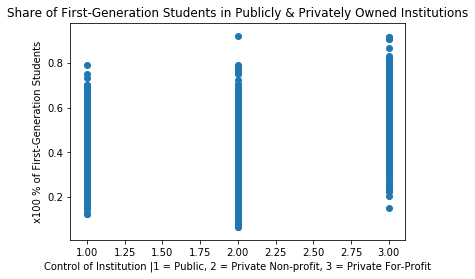

In [37]:
plt.title("Share of First-Generation Students in Publicly & Privately Owned Institutions")
plt.xlabel("Control of Institution |1 = Public, 2 = Private Non-profit, 3 = Private For-Profit")
plt.ylabel("x100 % of First-Generation Students")
plt.show()